<a href="https://colab.research.google.com/github/Reptilefury/coursera-machine-learning/blob/main/Three_Dimensional_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['image.cmap'] = 'gray'

#We display array values to 4 digits of precision
np.set_printoptions(precision=4,suppress= True)

In [6]:
import nibabel as nib

Use nipraxis to fetch the image data file

In [9]:
!pip install nipraxis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
import nipraxis

#Fetch file with nipraxis
structural_fname = nipraxis.fetch_file('ds114_sub009_highres.nii')
structural_fname 

'/root/.cache/nipraxis/0.4/ds114_sub009_highres.nii'

In [14]:
#We load the image into memory 
image = nib.load(structural_fname) #Load the MRI image data into memory
image

In [ ]:
print(image.header) #Print the image data stored on the header,

In [20]:
#We can get the shape of the loaded nifti file/image 
image.shape
#We can think of this as two hundred and fifty six images of shape 2D (256,156) width and height

(256, 156, 256)

In [28]:
print(image.dataobj) #This is a method of accessing the image data object
#plt.plot(image.dataobj)

In [33]:
#We can get image directly as an array  of floating point numbers through
image.get_fdata()
#Check the data type of the image we just loaded 
#type(image.get_fdata())
data = image.get_fdata()
data.dtype #floating point numbers 

dtype('float64')

We can get the summary statistics of these image through numpy

In [35]:
print(f"The mean intensity of this image is{data.mean()} the standard  deviation is: {data.std()}")

The mean intensity of this image is142.68081616574747 the standard  deviation is: 279.11470964903845


In [49]:
#middle sclice of the brain: Coranal (Brain cut in half from  side ways)
structural_fname = nipraxis.fetch_file('ds114_sub009_highres.nii')

#Load the data into memory using nibabel 
image = nib.load(structural_fname) 

#Get the image data from the file using nibabel attributes
data = image.get_fdata()

data.dtype#The data loaded are floating point numbers
#We can get the summary  statistics of the image we have loaded
print(f"The mean intensity of  the image is {data.mean()} and the standard deviation is {data.std()}")

The mean intensity of  the image is 142.68081616574747 and the standard deviation is 279.11470964903845


In [ ]:
#We can now the get the coronal view of the brain:  This is the view of the brain cut in half from the side 
#Get all rows, columns and a slice of the image i.e one of the 256 images
coronal_view = data[:,:, image.shape[-1]//2-1]
coronal_view
plt.figure(figsize=(5,5))
#plt.imshow(coronal_view)
degrees = 0

from scipy import ndimage 

rotated_coronal_view = ndimage.rotate(coronal_view,degrees *180)
plt.imshow(coronal_view)

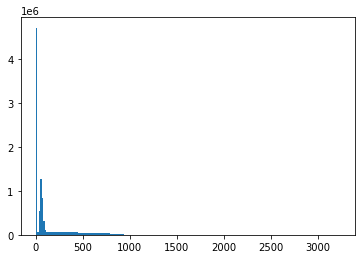

In [65]:
#Flatten the array (2D array) Matrix 
flattened_data = np.ravel(data)

#Plot the histogram 
histogram = plt.hist(flattened_data, bins=200) #We can clearly see that most of the values fall in between 0 to 900 

(array([  124.,   213.,   183.,   206.,   253.,   301.,   370.,   515.,
          708.,  1008.,  1364.,  1798.,  2180.,  2490.,  2670.,  2804.,
         2722.,  2684.,  2651.,  2664.,  2764.,  2769.,  2774.,  2970.,
         3120.,  3290.,  3636.,  4044.,  4580.,  5252.,  6123.,  6985.,
         8427.,  9877., 12205., 14200., 16951., 19750., 22987., 26752.,
        30579., 34404., 38763., 43008., 47523., 51868., 56420., 60275.,
        64224., 68358., 71090., 74380., 77613., 79745., 81721., 82643.,
        82975., 83678., 83373., 82830., 81782., 79838., 78958., 77476.,
        75574., 72456., 70122., 67376., 64381., 61570., 59009., 56207.,
        53239., 50384., 47931., 45041., 42006., 39722., 37251., 34714.,
        32678., 30595., 28274., 26469., 24746., 23083., 21337., 19886.,
        19037., 17521., 16216., 15129., 14106., 13250., 12667., 11655.,
        10844., 10476.,  9510.,  9122.,  8739.,  8174.,  7787.,  7495.,
         7114.,  6758.,  6524.,  6158.,  5946.,  5831.,  5514., 

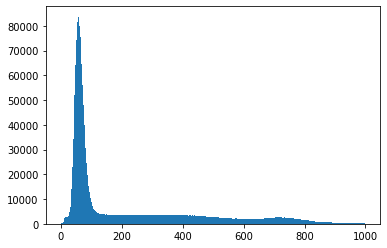

In [74]:
#Lets plot a histogram to show values between  0  and 1000 

plt.hist(data[(data>0) & (data<1000)],bins=1000) #We plot a histogram to visualize the data between 0  and 1000

In [87]:
#To Rotate the middle slice image we can  transpose the array Where by the rows become the column and the column become the rows 
filename = nipraxis.fetch_file('ds114_sub009_highres.nii')

#Get the image data from the file using nibabel 
image = nib.load(filename) 
image
#Load the image data into memory  through data attributes  stored on the image by nibabel 
data = image.get_fdata()

#Check the data type of the  image
type_data = type(data.dtype)
data.dtype

#Get the middle slice of the image 
coronal_view = data[:,:, image.shape[-1]//2-1]


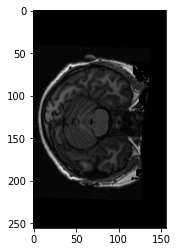

In [93]:
#View the image 
plt.imshow(coronal_view) #Before the image has been transposed

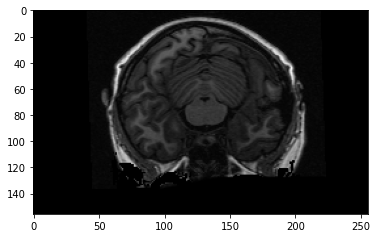

In [94]:
#Flip the image 
plt.imshow(coronal_view.T) #View of the brain from the back

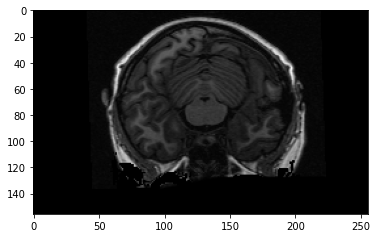

In [109]:
#Plot the sagital view
sagital_view = data[:,:,image.shape[-1]//2-1]
plt.imshow(sagital_view.T)

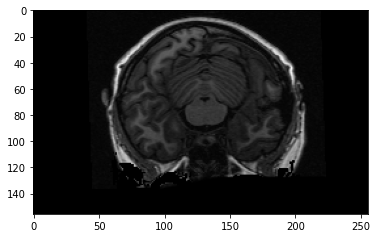

In [112]:
middle_slice = data[:,:,image.shape[-1]//2-1]
plt.imshow(middle_slice.T)

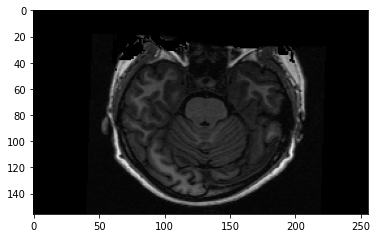

In [114]:
to_display = np.flipud(middle_slice.T)
plt.imshow(to_display)

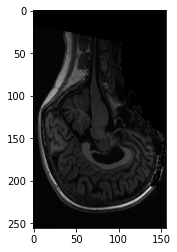

In [117]:
#We get the sagital view of the brain 
sagital_view = data[image.shape[0]//2,:,:]
plt.imshow(sagital_view.T)

In [ ]:
to_display = np.flipud(sagital_view.T)
plt.figure(figsize=(10,10))
plt.imshow(to_display)

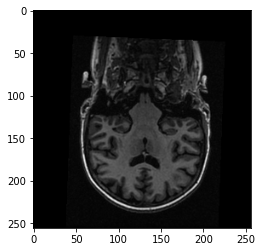

In [124]:
#Get the coronal slice of the brain 
xz_coronal_slice = data[:,78,:]
plt.imshow(xz_coronal_slice.T)

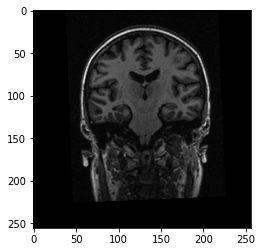

In [128]:
top_display = np.flipud(coronal_slice.T)
plt.imshow(top_display)

We can look at images three view planes through Nibabel's python's representation of images

<OrthoSlicer3D: /root/.cache/nipraxis/0.4/ds114_sub009_highres.nii (256, 156, 256)>

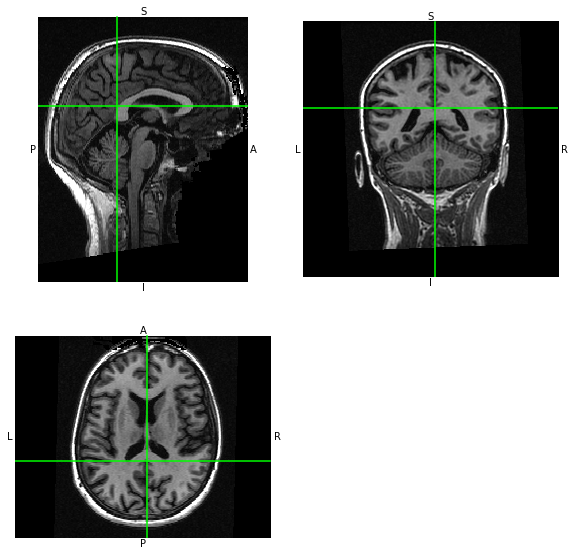

In [129]:
image.orthoview() #This function enables us to view the brain image 
#from all sides: Sagital view, Coronal view and axial view